<a href="https://colab.research.google.com/github/suyash-dabral/CarbonMarketsHQ_Assignments/blob/main/CarbonMarketsHQ_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
# Read the Excel file into a DataFrame
file_path = '/content/drive/MyDrive/CarbonMarkets_files/1.xlsx'
df = pd.read_excel(file_path)


In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

# Display basic information about the DataFrame
print(df.info())

# Display summary statistics
print(df.describe(include='all'))


  Project ID    ARB ID Cooperative/ Aggregate ID  \
0    CAR1957  CAFR6957                       NaN   
1    CAR1460       NaN                  CARC1397   
2    CAR1458  CAOD6458                       NaN   
3    CAR1560  CAOD6560                       NaN   
4    CAR1662  CAOD6662                       NaN   

               Project Developer                  Project Owner  \
0      Sierra Pacific Industries      Sierra Pacific Industries   
1              The Climate Trust         The Nature Conservancy   
2  Reclamation Technologies Inc.  Reclamation Technologies Inc.   
3  Reclamation Technologies Inc.  Reclamation Technologies Inc.   
4  Reclamation Technologies Inc.  Reclamation Technologies Inc.   

     Project Name                    Offset Project Operator  \
0  2021 Fire Refo                  Sierra Pacific Industries   
1        54 Ranch                                        NaN   
2    A-Gas 1-2021  Reclamation Technologies, Inc., dba A-Gas   
3    A-Gas 1-2022           

#Handling data inconsistency and cleaning data in Sheet 1

In [ ]:
# Standardize column names
df.columns = [col.strip().lower().replace(' ', '_').replace('/', '_').replace('(', '').replace(')', '') for col in df.columns]

# Handle missing values
# For numeric columns, fill with the mean
numeric_columns = ['total_number_of_offset_credits_registered']
for col in numeric_columns:
    if col in df.columns:
        df[col].fillna(df[col].mean(), inplace=True)

# For categorical columns, fill with a placeholder
categorical_columns = [
    'project_id', 'arb_id', 'cooperative_aggregate_id', 'project_developer', 'project_owner', 'project_name',
    'offset_project_operator', 'authorized_project_designee', 'verification_body', 'project_type', 'status',
    'arb_project_status', 'corsia_eligible', 'project_site_location', 'project_site_state', 'project_site_country',
    'additional_certifications', 'sdg_impact', 'project_notes', 'project_listed_date', 'project_registered_date',
    'documents', 'data', 'project_website'
]

for col in categorical_columns:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)

# Handle inconsistent data formats
df['project_listed_date'] = pd.to_datetime(df['project_listed_date'], errors='coerce')
df['project_registered_date'] = pd.to_datetime(df['project_registered_date'], errors='coerce')

# Ensure all data is in the correct format
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify data types
print(df.dtypes)

# Save the cleaned DataFrame to a new Excel file
df.to_excel('/content/drive/MyDrive/CarbonMarkets_files/cleaned_data1.xlsx', index=False)

print("Data cleaning complete and saved to 'cleaned_data.xlsx'")

<ipython-input-24-473d396c8b83>:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df[col].fillna('Unknown', inplace=True)
<ipython-input-24-473d396c8b83>:26: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['project_registered_date'] = pd.to_datetime(df['project_registered_date'], errors='coerce')


project_id                                    object
arb_id                                        object
cooperative__aggregate_id                     object
project_developer                             object
project_owner                                 object
project_name                                  object
offset_project_operator                       object
authorized_project_designee                   object
verification_body                             object
project_type                                  object
status                                        object
arb_project_status                            object
corsia_eligible                               object
project_site_location                         object
project_site_state                            object
project_site_country                          object
additional_certifications                     object
sdg_impact                                    object
project_notes                                 

#Handling data inconsistency and cleaning data in Sheet 2

In [ ]:
# Read the Excel file into a DataFrame
file_path = '/content/drive/MyDrive/CarbonMarkets_files/2.xlsx'
df = pd.read_excel(file_path)

In [ ]:
# Display the first few rows of the DataFrame
print(df.head())

# Display basic information about the DataFrame
print(df.info())

# Display summary statistics
print(df.describe(include='all'))


  Project ID Compliance Program ID (ARB or Ecology)  Project Developer  \
0     ACR586                                    NaN  The Climate Trust   
1     ACR206                               CAOD5052    EOS Climate Inc   
2     ACR203                                    NaN    EOS Climate Inc   
3     ACR521                               CAOD5521      A-Gas US Inc.   
4    ACR1042                               CAOD1042      A-Gas US Inc.   

                        Project Name                Project Type  \
0  18 Reserves Forest Carbon Project               Forest Carbon   
1                            2014-P4  Ozone Depleting Substances   
2                            2014-P5  Ozone Depleting Substances   
3                       A-Gas 1-2020  Ozone Depleting Substances   
4                       A-Gas 1-2024  Ozone Depleting Substances   

                        Project Methodology/Protocol  \
0  Improved Forest Management (IFM) on Non-Federa...   
1  ARB Compliance Offset Protocol:

In [ ]:
# Standardize column names
df.columns = [col.strip().lower().replace(' ', '_').replace('/', '_').replace('(', '').replace(')', '') for col in df.columns]

# Handle missing values
# For numeric columns, fill with the mean
if 'total_number_of_credits_registered' in df.columns:
    df['total_number_of_credits_registered'].fillna(df['total_number_of_credits_registered'].mean(), inplace=True)

# For categorical columns, fill with a placeholder
categorical_columns = [
    'project_id', 'compliance_program_id_arb_or_ecology', 'project_developer', 'project_name', 'project_type',
    'project_methodology_protocol', 'initial_crediting_period_start_date', 'current_crediting_period_start_date',
    'current_crediting_period_end_date', 'voluntary_status', 'compliance_program_status_arb_or_ecology',
    'project_status_date', 'project_site_location', 'project_site_state', 'project_site_country',
    'sustainable_development_goals', 'current_vvb', 'acr_project_validation', 'documents', 'project_website'
]

for col in categorical_columns:
    if col in df.columns:
        df[col].fillna('Unknown', inplace=True)

# Handle inconsistent data formats
date_columns = [
    'initial_crediting_period_start_date', 'current_crediting_period_start_date', 'current_crediting_period_end_date',
    'project_status_date'
]

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Ensure all data is in the correct format
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().str.lower()

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Verify data types
print(df.dtypes)

# Save the cleaned DataFrame to a new Excel file
df.to_excel('/content/drive/MyDrive/CarbonMarkets_files/cleaned_data2.xlsx', index=False)

print("Data cleaning complete and saved to 'cleaned_data2.xlsx'")

project_id                                   object
compliance_program_id_arb_or_ecology         object
project_developer                            object
project_name                                 object
project_type                                 object
project_methodology_protocol                 object
initial_crediting_period_start_date          object
current_crediting_period_start_date          object
current_crediting_period_end_date            object
voluntary_status                             object
compliance_program_status_arb_or_ecology     object
project_status_date                          object
project_site_location                        object
project_site_state                           object
project_site_country                         object
sustainable_development_goals                object
current_vvb                                  object
acr_project_validation                       object
total_number_of_credits_registered          float64
documents   

In [ ]:
# Rename the column
df.rename(columns={'initial_crediting_period_start_date': 'project_listed_date'}, inplace=True)


In [ ]:
# Path to the Excel files
file_path_1 = '/content/drive/MyDrive/CarbonMarkets_files/cleaned_data1.xlsx'
file_path_2 = '/content/drive/MyDrive/CarbonMarkets_files/cleaned_data2.xlsx'

# Read the Excel files into DataFrames
df1 = pd.read_excel(file_path_1)
df2 = pd.read_excel(file_path_2)


In [ ]:
def standardize_column_names(df, column_mapping):
    df.rename(columns=column_mapping, inplace=True)
    df.columns = [col.strip().lower().replace(' ', '_').replace('/', '_').replace('(', '').replace(')', '') for col in df.columns]
    return df

# Define the column mappings for each DataFrame
column_mapping_df1 = {
    'Project ID': 'project_id',
    'Compliance Program ID (ARB or Ecology)': 'compliance_program_id',
    'Project Developer': 'project_developer',
    'Project Name': 'project_name',
    'Project Type': 'project_type',
    'Project Methodology/Protocol': 'project_methodology',
    'Initial Crediting Period Start Date': 'initial_crediting_period_start_date',
    'Current Crediting Period Start Date': 'current_crediting_period_start_date',
    'Current Crediting Period End Date': 'current_crediting_period_end_date',
    'Voluntary Status': 'voluntary_status',
    'Compliance Program Status (ARB or Ecology)': 'compliance_program_status',
    'Project Status Date': 'project_status_date',
    'Project Site Location': 'project_site_location',
    'Project Site State': 'project_site_state',
    'Project Site Country': 'project_site_country',
    'Sustainable Development Goal(s)': 'sustainable_development_goals',
    'Current VVB': 'current_vvb',
    'ACR Project Validation': 'acr_project_validation',
    'Total Number of Credits Registered': 'total_number_of_credits_registered',
    'Documents': 'documents',
    'Project Website': 'project_website'
}

column_mapping_df2 = {
    # Define similar mappings for the second DataFrame
    'Proj ID': 'project_id',
    'Comp Program ID': 'compliance_program_id',
    'Proj Developer': 'project_developer',
    'Proj Name': 'project_name',
    'Proj Type': 'project_type',
    'Proj Method/Protocol': 'project_methodology',
    'Init Crediting Start Date': 'initial_crediting_period_start_date',
    'Curr Crediting Start Date': 'current_crediting_period_start_date',
    'Curr Crediting End Date': 'current_crediting_period_end_date',
    'Vol Status': 'voluntary_status',
    'Comp Program Status': 'compliance_program_status',
    'Proj Status Date': 'project_status_date',
    'Proj Site Location': 'project_site_location',
    'Proj Site State': 'project_site_state',
    'Proj Site Country': 'project_site_country',
    'Sustainable Dev Goal(s)': 'sustainable_development_goals',
    'Curr VVB': 'current_vvb',
    'ACR Proj Validation': 'acr_project_validation',
    'Total Credits Registered': 'total_number_of_credits_registered',
    'Docs': 'documents',
    'Proj Website': 'project_website'
}

# Standardize column names
df1 = standardize_column_names(df1, column_mapping_df1)
df2 = standardize_column_names(df2, column_mapping_df2)


In [ ]:
key_columns = [
    'project_id',  'project_name', 'project_type','project_site_location', 'project_site_state', 'project_site_country',
    'total_number_of_credits_registered'
]

# Check for existing columns in both DataFrames
df1_key_columns = [col for col in key_columns if col in df1.columns]
df2_key_columns = [col for col in key_columns if col in df2.columns]

# Select key columns from both DataFrames
df1 = df1[df1_key_columns]
df2 = df2[df2_key_columns]



In [ ]:
# Concatenate the DataFrames
unified_df = pd.concat([df1, df2], ignore_index=True)

# Optional: Remove duplicates if needed
unified_df.drop_duplicates(inplace=True)

# Optional: Handle missing values again if necessary
if 'total_number_of_credits_registered' in unified_df.columns:
    unified_df['total_number_of_credits_registered'].fillna(unified_df['total_number_of_credits_registered'].mean(), inplace=True)


In [ ]:
# Save the unified DataFrame to a new Excel file
unified_df.to_excel('/content/drive/MyDrive/CarbonMarkets_files/new_unified_data.xlsx', index=False)

print("Unified dataset created and saved to 'unified_data.xlsx'")


Unified dataset created and saved to 'unified_data.xlsx'


In [ ]:
# Load the unified dataset
file_path = '/content/drive/MyDrive/CarbonMarkets_files/unified_data.xlsx'
df = pd.read_excel(file_path)


In [ ]:
# Calculate total credits issued by project type
total_credits_by_project_type = df.groupby('project_type')['total_number_of_credits_registered'].sum().reset_index()
print("Total Credits Issued by Project Type:")
print(total_credits_by_project_type)

# Calculate total credits issued by country
total_credits_by_country = df.groupby('project_site_country')['total_number_of_credits_registered'].sum().reset_index()
print("\nTotal Credits Issued by Country:")
print(total_credits_by_country)


Total Credits Issued by Project Type:
                                         project_type  \
0                                         adipic acid   
1                        agricultural land management   
2                                  avoided conversion   
3                 avoided conversion - arb compliance   
4                        avoided grassland conversion   
5                                    canada grassland   
6                      carbon capture & storage (ccs)   
7                                   coal mine methane   
8                        coal mine methane - drainage   
9                             coal mine methane - vam   
10               conservation-based forest management   
11                                  energy efficiency   
12                                      forest carbon   
13                                      forestry - mx   
14                                     fuel switching   
15                         improved forest managem

In [ ]:
# Find the project with the highest credit issuance
highest_credit_project = df.loc[df['total_number_of_credits_registered'].idxmax()]

# Find the project with the lowest credit issuance (excluding zero credits)
lowest_credit_project = df[df['total_number_of_credits_registered'] > 0].loc[df['total_number_of_credits_registered'].idxmin()]

print("Project with the highest credit issuance:")
print(highest_credit_project)

print("\nProject with the lowest credit issuance:")
print(lowest_credit_project)


Project with the highest credit issuance:
project_id                                                              acr360
project_name                          finite carbon - ahtna native alaskan ifm
project_type                                                     forest carbon
project_site_location                                           glennallen, ak
project_site_state                                                      alaska
project_site_country                                                        us
total_number_of_credits_registered                                  16085960.0
Name: 1240, dtype: object

Project with the lowest credit issuance:
project_id                                                     acr171
project_name                          nitrous oxide reduction in corn
project_type                             agricultural land management
project_site_location                                           reese
project_site_state                                       

<ipython-input-70-75ad57802034>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_highest_credits, x='total_number_of_credits_registered', y='project_name', palette='viridis')


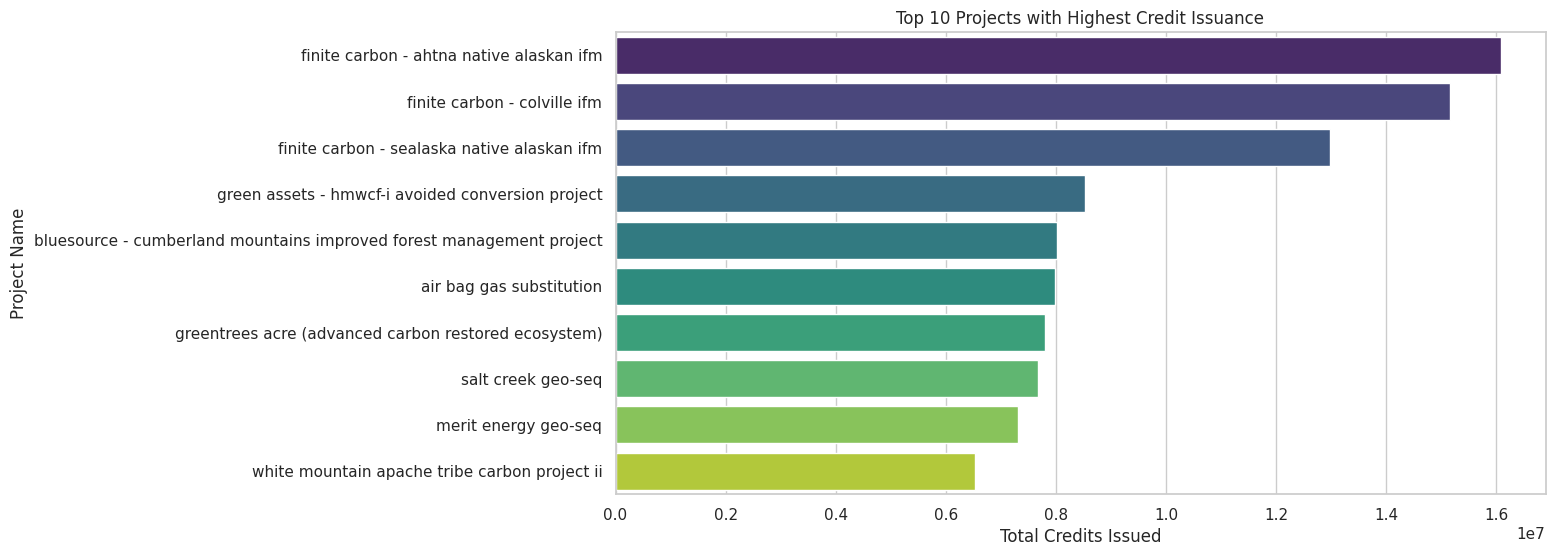

<ipython-input-70-75ad57802034>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_lowest_credits, x='total_number_of_credits_registered', y='project_name', palette='viridis')


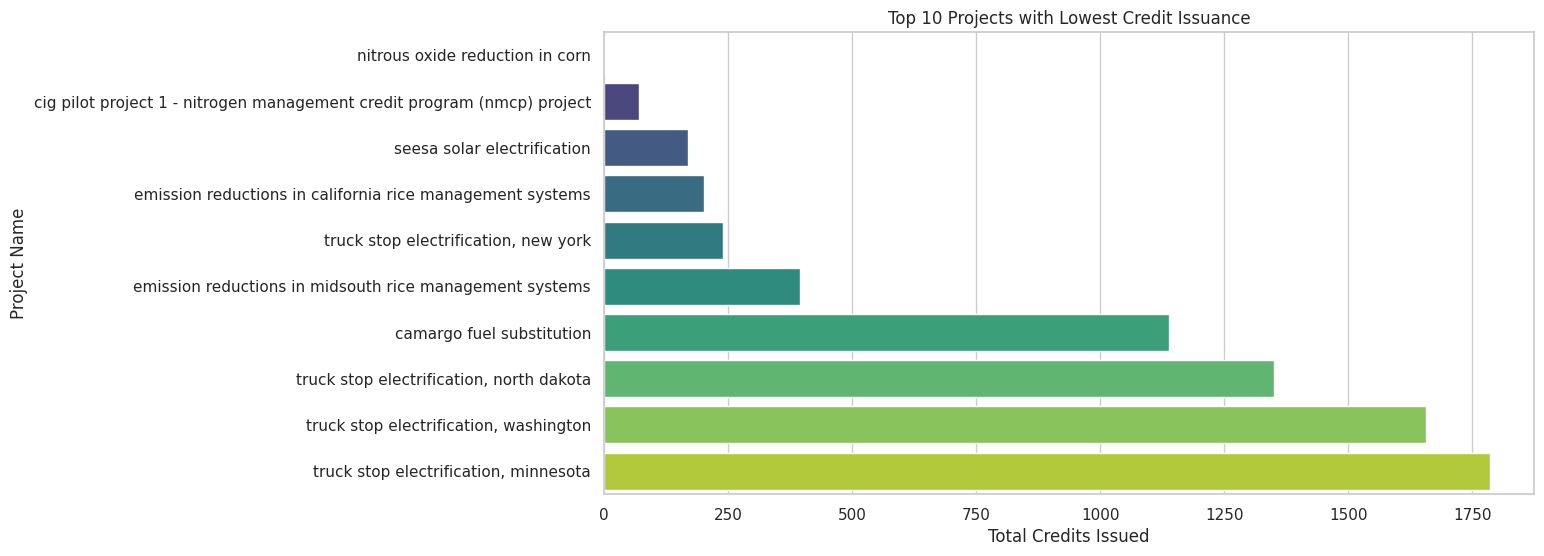

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Top 10 projects with highest credit issuance
top_10_highest_credits = df.nlargest(10, 'total_number_of_credits_registered')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_highest_credits, x='total_number_of_credits_registered', y='project_name', palette='viridis')
plt.title('Top 10 Projects with Highest Credit Issuance')
plt.xlabel('Total Credits Issued')
plt.ylabel('Project Name')
plt.show()

# Top 10 projects with lowest credit issuance (excluding zero credits)
top_10_lowest_credits = df[df['total_number_of_credits_registered'] > 0].nsmallest(10, 'total_number_of_credits_registered')

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_lowest_credits, x='total_number_of_credits_registered', y='project_name', palette='viridis')
plt.title('Top 10 Projects with Lowest Credit Issuance')
plt.xlabel('Total Credits Issued')
plt.ylabel('Project Name')
plt.show()


In [72]:

# Load the combined data
combined_file_path = '/content/drive/MyDrive/CarbonMarkets_files/unified_data.xlsx'
df = pd.read_excel(combined_file_path)

def query_dataset(project_type=None, country=None):
    # Filter the dataset based on user input
    filtered_df = df
    if project_type:
        filtered_df = filtered_df[filtered_df['project_type'].str.contains(project_type, case=False, na=False)]
    if country:
        filtered_df = filtered_df[filtered_df['project_site_country'].str.contains(country, case=False, na=False)]

    return filtered_df

def simulate_cli(project_type=None, country=None):
    result = query_dataset(project_type, country)
    print(result)

# Simulate command-line input
project_type_input = "ozone depleting substances"  # Change this to your desired project type
country_input = "us"  # Change this to your desired country

simulate_cli(project_type=project_type_input, country=country_input)


     project_id            project_name  \
2       car1458            a-gas 1-2021   
3       car1560            a-gas 1-2022   
4       car1662            a-gas 1-2023   
5       car1481            a-gas 2-2021   
6       car1578            a-gas 2-2022   
...         ...                     ...   
1697     acr254  wabashco clean sweep 6   
1698     acr275  wabashco clean sweep 7   
1699     acr314  wabashco clean sweep 8   
1700     acr343  wabashco clean sweep 9   
1701     acr179  wabashco clean sweep i   

                                           project_type  \
2     ozone depleting substances - u.s. - arb compli...   
3     ozone depleting substances - u.s. - arb compli...   
4     ozone depleting substances - u.s. - arb compli...   
5     ozone depleting substances - u.s. - arb compli...   
6     ozone depleting substances - u.s. - arb compli...   
...                                                 ...   
1697                         ozone depleting substances   
1698       